My Project on Analysing Uber Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read Data Set
df = pd.read_csv('ncr_ride_bookings.csv')

#Checking the format of the DataFram
#Check the first few rows of the DataFrame
df.head()

#Check the last few rows of the DataFrame
df.tail()

#Check the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

Cleaning the data

In [8]:
#Check for missing values
print(df.isnull().sum())

#Check for duplicate rows
print(df.duplicated().sum())

#formatting date columns
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

df['Day'] = df['Date'].dt.day_name()
df['Month_name'] = df['Date'].dt.month_name()
df['Hour'] = df['Time'].dt.hour

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
Day                                       0
Month_name                      

In [14]:
#Finding bookings per day based on time of day

def bookings_by_day_and_hour(df):
    return df.groupby(['Day', 'Hour']).size()

result = bookings_by_day_and_hour(df)
print(result)

Day        Hour
Friday     0        180
           1        187
           2        190
           3        203
           4        204
                   ... 
Wednesday  19      1565
           20      1412
           21      1109
           22       791
           23       428
Length: 168, dtype: int64


In [19]:
#Checking for bvookings by time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


In [23]:
df['Time of Day'] = df['Hour'].apply(time_of_day)


Plotting our findings

C:\Users\Matthew Sum\AppData\Local\Temp\ipykernel_3840\3564647194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time of Day', order=['Morning','Afternoon','Evening','Night'], palette="Set3")


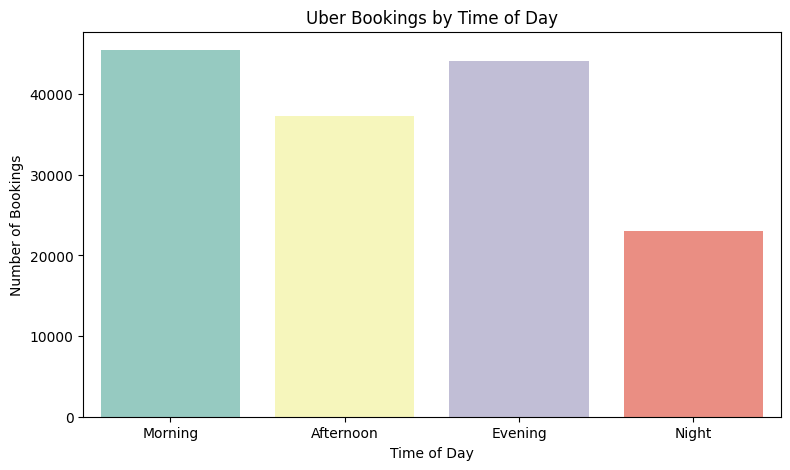

In [26]:
#Plot bookings by time of day
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='Time of Day', order=['Morning','Afternoon','Evening','Night'], palette="Set3")
plt.title("Uber Bookings by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Bookings")
plt.show()

Looking at some basic statistics

In [28]:
#Define statistics to compute
metrics = {
    'Ride Distance (kms)': 'Ride Distance',
    'Booking Value ($)': 'Booking Value',
    'Driver Rating': 'Driver Ratings',
    'Customer Rating': 'Customer Rating',
    'VTAT': 'Avg VTAT',
    'CTAT': 'Avg CTAT'
}

# Compute averages
averages = {name: round(df[col].mean(), 2) for name, col in metrics.items()}

# Print results
for name, value in averages.items():
    print(f"{name}: {value}")

Ride Distance (kms): 24.64
Booking Value ($): 508.3
Driver Rating: 4.23
Customer Rating: 4.4
VTAT: 8.46
CTAT: 29.15
